<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Hierarchical%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/Layer-Readings_2.csv",header=None)

In [2]:
print(df)

           0        1           2          3   ...   11   12   13     14
0           0        0  329.996735  36.054607  ...  0.0  0.0  0.0  31669
1           0        0  330.775604  37.902195  ...  0.0  0.0  0.0  31670
2           0        0  329.943512  42.349632  ...  0.0  0.0  0.0  31671
3           0        0  329.553131  41.687881  ...  0.0  0.0  0.0  31672
4           0        0  332.050140  42.752476  ...  0.0  0.0  0.0  31673
...       ...      ...         ...        ...  ...  ...  ...  ...    ...
663109  16854  2293761  331.718628  42.900658  ...  0.0  0.0  0.0  21033
663110  16959  2293761  330.562775  37.563095  ...  0.0  0.0  0.0  21034
663111  17065  2293761  330.347748  41.163986  ...  0.0  0.0  0.0  21035
663112  17172  2293761  331.059784  32.140606  ...  0.0  0.0  0.0  21036
663113  17277  2293761  330.106598  31.508242  ...  0.0  0.0  0.0  21037

[663114 rows x 15 columns]


In [3]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [4]:
sorted(df)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [5]:
df.drop(['0','1','3','5', '8','10','12','14', '7', '9', '11', '13'],axis='columns', inplace=True)

In [6]:
print(df)

                 2            4          6
0       329.996735     0.000000    0.00000
1       330.775604     0.000000    0.00000
2       329.943512   363.551544    0.00000
3       329.553131  2318.262207  364.41507
4       332.050140     0.000000    0.00000
...            ...          ...        ...
663109  331.718628     0.000000    0.00000
663110  330.562775   361.645508    0.00000
663111  330.347748   362.771545    0.00000
663112  331.059784     0.000000    0.00000
663113  330.106598     0.000000    0.00000

[663114 rows x 3 columns]


In [7]:
df['Index'] = range(0, 0+len(df))

In [8]:
cols = df.columns.tolist()
cols

['2', '4', '6', 'Index']

In [9]:
cols = cols[-1:] + cols[:-1]
cols

['Index', '2', '4', '6']

In [10]:
df = df[cols]
print(df)

         Index           2            4          6
0            0  329.996735     0.000000    0.00000
1            1  330.775604     0.000000    0.00000
2            2  329.943512   363.551544    0.00000
3            3  329.553131  2318.262207  364.41507
4            4  332.050140     0.000000    0.00000
...        ...         ...          ...        ...
663109  663109  331.718628     0.000000    0.00000
663110  663110  330.562775   361.645508    0.00000
663111  663111  330.347748   362.771545    0.00000
663112  663112  331.059784     0.000000    0.00000
663113  663113  330.106598     0.000000    0.00000

[663114 rows x 4 columns]


In [11]:
df2 = df.set_index('Index').stack().reset_index()

In [12]:
print(df2)

          Index level_1           0
0             0       2  329.996735
1             0       4    0.000000
2             0       6    0.000000
3             1       2  330.775604
4             1       4    0.000000
...         ...     ...         ...
1989337  663112       4    0.000000
1989338  663112       6    0.000000
1989339  663113       2  330.106598
1989340  663113       4    0.000000
1989341  663113       6    0.000000

[1989342 rows x 3 columns]


In [13]:
df3 = df2.rename(columns = {'level_1': 'Column', 0: 'Value'}, inplace = False)

In [14]:
df4 = df3.loc[~((df3['Value'] == 0))]

In [15]:
print(df4)

          Index Column       Value
0             0      2  329.996735
3             1      2  330.775604
6             2      2  329.943512
7             2      4  363.551544
9             3      2  329.553131
...         ...    ...         ...
1989331  663110      4  361.645508
1989333  663111      2  330.347748
1989334  663111      4  362.771545
1989336  663112      2  331.059784
1989339  663113      2  330.106598

[1212626 rows x 3 columns]


In [16]:
df4_test = pd.DataFrame(df4)
selected_columns = df4_test[["Value","Column"]]

new_df = selected_columns.copy()
print(new_df)

              Value Column
0        329.996735      2
3        330.775604      2
6        329.943512      2
7        363.551544      4
9        329.553131      2
...             ...    ...
1989331  361.645508      4
1989333  330.347748      2
1989334  362.771545      4
1989336  331.059784      2
1989339  330.106598      2

[1212626 rows x 2 columns]


In [20]:
df_plot= new_df
df_plot['num']=df_plot.index
df_plot=df_plot[df_plot['num']%40==0]

In [21]:
print(df_plot)

              Value Column      num
0        329.996735      2        0
80       363.210968      6       80
120      330.502350      2      120
240      332.671600      2      240
280      361.138458      4      280
...             ...    ...      ...
1988920  362.709686      4  1988920
1989000  330.544861      2  1989000
1989120  330.544525      2  1989120
1989160  363.007782      4  1989160
1989240  332.357727      2  1989240

[30293 rows x 3 columns]


In [22]:
test_plot = pd.DataFrame(df_plot)
selected_columns = test_plot[["Value"]]

test_plot = selected_columns.copy()
print(test_plot)

              Value
0        329.996735
80       363.210968
120      330.502350
240      332.671600
280      361.138458
...             ...
1988920  362.709686
1989000  330.544861
1989120  330.544525
1989160  363.007782
1989240  332.357727

[30293 rows x 1 columns]


Hierarchihcal clustering

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [24]:
X = test_plot.iloc[:, [0]].values

In [25]:
test_plot.size

30293

In [26]:
X.size

30293

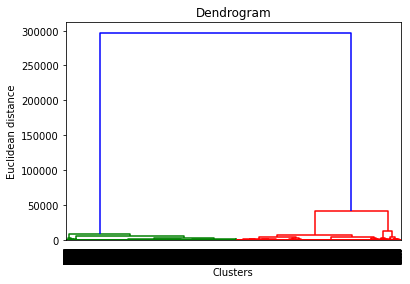

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [29]:
y_hc=hc.fit_predict(X)

In [30]:
print(y_hc)

[1 1 1 ... 1 1 1]


In [31]:
y_hc.size

30293

In [32]:
print(df_plot)

              Value Column      num
0        329.996735      2        0
80       363.210968      6       80
120      330.502350      2      120
240      332.671600      2      240
280      361.138458      4      280
...             ...    ...      ...
1988920  362.709686      4  1988920
1989000  330.544861      2  1989000
1989120  330.544525      2  1989120
1989160  363.007782      4  1989160
1989240  332.357727      2  1989240

[30293 rows x 3 columns]


In [33]:
df_plot.reset_index(drop=True, inplace=True)
print(df_plot)

            Value Column      num
0      329.996735      2        0
1      363.210968      6       80
2      330.502350      2      120
3      332.671600      2      240
4      361.138458      4      280
...           ...    ...      ...
30288  362.709686      4  1988920
30289  330.544861      2  1989000
30290  330.544525      2  1989120
30291  363.007782      4  1989160
30292  332.357727      2  1989240

[30293 rows x 3 columns]


In [34]:
new_series = pd.Series(y_hc)

In [35]:
conv_ser_df = new_series.to_frame()

In [36]:
print(conv_ser_df)

       0
0      1
1      1
2      1
3      1
4      1
...   ..
30288  1
30289  1
30290  1
30291  1
30292  1

[30293 rows x 1 columns]


In [37]:
conv_ser_df.columns = ['labels']

In [38]:
conv_ser_df.labels.unique()

array([1, 0, 2])

In [39]:
df_plot = pd.concat([df_plot, conv_ser_df], axis=1) 

In [40]:
print(df_plot)

            Value Column      num  labels
0      329.996735      2        0       1
1      363.210968      6       80       1
2      330.502350      2      120       1
3      332.671600      2      240       1
4      361.138458      4      280       1
...           ...    ...      ...     ...
30288  362.709686      4  1988920       1
30289  330.544861      2  1989000       1
30290  330.544525      2  1989120       1
30291  363.007782      4  1989160       1
30292  332.357727      2  1989240       1

[30293 rows x 4 columns]


In [41]:
df_plot.drop(['Column','num'],axis='columns', inplace=True)

In [ ]:
df_plot.to_csv("hc_labeling.csv")

In [42]:
len(df_plot.index)

30293

In [43]:
dfhc_label_0= df_plot[df_plot['labels']==0].copy()

In [46]:
print(dfhc_label_0)

             Value  labels
6      2309.598389       0
14     2305.312500       0
26     2321.235107       0
58     2226.104736       0
145    2303.066162       0
...            ...     ...
30153  2302.877197       0
30191  2303.765137       0
30240  2316.844238       0
30275  2323.135010       0
30283  2296.245605       0

[1892 rows x 2 columns]


In [47]:
dfhc_label_0['Value'].std()

224.39052820717478

In [44]:
dfhc_label_1= df_plot[df_plot['labels']==1].copy()

In [48]:
print(dfhc_label_1)

            Value  labels
0      329.996735       1
1      363.210968       1
2      330.502350       1
3      332.671600       1
4      361.138458       1
...           ...     ...
30288  362.709686       1
30289  330.544861       1
30290  330.544525       1
30291  363.007782       1
30292  332.357727       1

[15422 rows x 2 columns]


In [49]:
dfhc_label_1['Value'].std()

65.54733539684594

In [45]:
dfhc_label_2= df_plot[df_plot['labels']==2].copy()

In [50]:
print(dfhc_label_2)

             Value  labels
191    2498.546387       2
220    2599.917969       2
221    2600.612305       2
233    2509.802246       2
257    2602.088623       2
...            ...     ...
29660  2551.750732       2
29875  2491.296875       2
29988  2501.092285       2
30228  2596.303223       2
30264  2579.493408       2

[12979 rows x 2 columns]


In [51]:
dfhc_label_2['Value'].std()

57.93000153846776

In [52]:
label_1_cl = dfhc_label_1.iloc[:, [0]].values

In [53]:
label_1_cl.size

15422

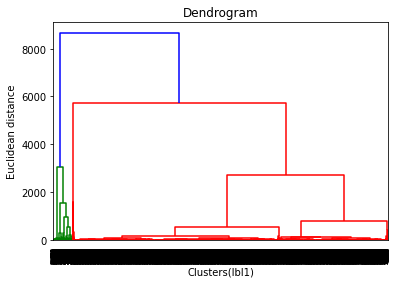

In [54]:
dendrogram = sch.dendrogram(sch.linkage(label_1_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl1)')
plt.ylabel('Euclidean distance')
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering 
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [56]:
y_hc1=hc1.fit_predict(label_1_cl)

In [57]:
print(y_hc1)

[1 1 1 ... 1 1 1]


In [58]:
new_series1 = pd.Series(y_hc1)

In [59]:
conv_ser_df1 = new_series1.to_frame()

In [60]:
conv_ser_df1.columns = ['2nd labeling']

In [61]:
print(conv_ser_df1)

       2nd labeling
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
15417             1
15418             1
15419             1
15420             1
15421             1

[15422 rows x 1 columns]


In [62]:
dfhc_label_1.reset_index(drop=True, inplace=True)
print(dfhc_label_1)

            Value  labels
0      329.996735       1
1      363.210968       1
2      330.502350       1
3      332.671600       1
4      361.138458       1
...           ...     ...
15417  362.709686       1
15418  330.544861       1
15419  330.544525       1
15420  363.007782       1
15421  332.357727       1

[15422 rows x 2 columns]


In [63]:
dfhc_label_1 = pd.concat([dfhc_label_1, conv_ser_df1], axis=1) 
print(dfhc_label_1)

            Value  labels  2nd labeling
0      329.996735       1             1
1      363.210968       1             1
2      330.502350       1             1
3      332.671600       1             1
4      361.138458       1             1
...           ...     ...           ...
15417  362.709686       1             1
15418  330.544861       1             1
15419  330.544525       1             1
15420  363.007782       1             1
15421  332.357727       1             1

[15422 rows x 3 columns]


In [ ]:
# sum_column = dfhc_label_1["labels"] + dfhc_label_1["2nd labeling"]
# dfhc_label_1["Final Cluster"] = sum_column
# print(dfhc_label_1)

In [ ]:
dfhc_label_1.to_csv("dfhc_label_1.csv")

In [64]:
label_2_cl = dfhc_label_2.iloc[:, [0]].values

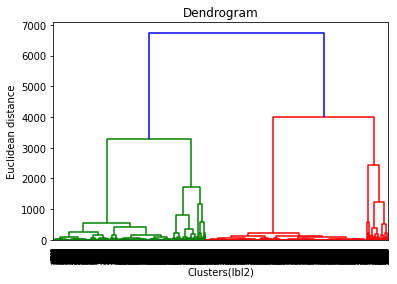

In [65]:
dendrogram = sch.dendrogram(sch.linkage(label_2_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl2)')
plt.ylabel('Euclidean distance')
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering 
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [67]:
y_hc2=hc2.fit_predict(label_2_cl)

In [68]:
print(y_hc2)

[0 0 0 ... 0 0 0]


In [69]:
new_series2 = pd.Series(y_hc2)

In [70]:
conv_ser_df2 = new_series2.to_frame()

In [71]:
conv_ser_df2.columns = ['2nd labeling']

In [72]:
dfhc_label_2.reset_index(drop=True, inplace=True)
print(dfhc_label_2)

             Value  labels
0      2498.546387       2
1      2599.917969       2
2      2600.612305       2
3      2509.802246       2
4      2602.088623       2
...            ...     ...
12974  2551.750732       2
12975  2491.296875       2
12976  2501.092285       2
12977  2596.303223       2
12978  2579.493408       2

[12979 rows x 2 columns]


In [73]:
dfhc_label_2 = pd.concat([dfhc_label_2, conv_ser_df2], axis=1)
print(dfhc_label_2)

             Value  labels  2nd labeling
0      2498.546387       2             0
1      2599.917969       2             0
2      2600.612305       2             0
3      2509.802246       2             0
4      2602.088623       2             0
...            ...     ...           ...
12974  2551.750732       2             0
12975  2491.296875       2             0
12976  2501.092285       2             0
12977  2596.303223       2             0
12978  2579.493408       2             0

[12979 rows x 3 columns]


In [ ]:
# dfhc_label_2["Final Cluster"] = dfhc_label_2.apply(lambda row: row['labels'] + row['2nd labeling'], axis=1)
# print(dfhc_label_2)

In [ ]:
dfhc_label_2.to_csv("dfhc_label_2.csv")

In [74]:
dfhc_label_0['2nd labeling'] = 0

In [ ]:
# dfhc_label_0["Final Cluster"] = dfhc_label_0.apply(lambda row: row['labels'] + row['2nd labeling'], axis=1)
# print(dfhc_label_0)

In [75]:
frames = [dfhc_label_0,dfhc_label_1,dfhc_label_2]
df_finalized_cluster = pd.concat(frames, keys=['label0', 'label1', 'label2'])
print(df_finalized_cluster)

                    Value  labels  2nd labeling
label0 6      2309.598389       0             0
       14     2305.312500       0             0
       26     2321.235107       0             0
       58     2226.104736       0             0
       145    2303.066162       0             0
...                   ...     ...           ...
label2 12974  2551.750732       2             0
       12975  2491.296875       2             0
       12976  2501.092285       2             0
       12977  2596.303223       2             0
       12978  2579.493408       2             0

[30293 rows x 3 columns]


In [ ]:
# df_finalized_cluster.drop(['Final Cluster'],axis='columns', inplace=True)

In [76]:
print(df_finalized_cluster)

                    Value  labels  2nd labeling
label0 6      2309.598389       0             0
       14     2305.312500       0             0
       26     2321.235107       0             0
       58     2226.104736       0             0
       145    2303.066162       0             0
...                   ...     ...           ...
label2 12974  2551.750732       2             0
       12975  2491.296875       2             0
       12976  2501.092285       2             0
       12977  2596.303223       2             0
       12978  2579.493408       2             0

[30293 rows x 3 columns]


In [78]:
df_finalized_cluster.rename(columns={'2nd labeling':'Second_labeling'},inplace=True)
print(df_finalized_cluster)

                    Value  labels  Second_labeling
label0 6      2309.598389       0                0
       14     2305.312500       0                0
       26     2321.235107       0                0
       58     2226.104736       0                0
       145    2303.066162       0                0
...                   ...     ...              ...
label2 12974  2551.750732       2                0
       12975  2491.296875       2                0
       12976  2501.092285       2                0
       12977  2596.303223       2                0
       12978  2579.493408       2                0

[30293 rows x 3 columns]


In [79]:
def final_cluster(flabel,slabel):
    if (flabel==0) & (slabel ==0):
         return 0
    elif ((flabel==1) & (slabel ==0)):
         return 1
    elif ((flabel==1) & (slabel ==1)):
         return 2
    elif (flabel==1) & (slabel ==2):
         return 3
    elif (flabel==2) & (slabel ==0):
         return 4
    elif (flabel==2) & (slabel ==1):
         return 5
    elif (flabel==2) & (slabel ==2):
         return 6
    else:
         return 7

In [80]:
df_finalized_cluster['Final Cluster'] = df_finalized_cluster.apply(lambda x: final_cluster(x.labels,x.Second_labeling), axis=1)

In [81]:
df_finalized_cluster.head

<bound method NDFrame.head of                     Value  labels  Second_labeling  Final Cluster
label0 6      2309.598389       0                0              0
       14     2305.312500       0                0              0
       26     2321.235107       0                0              0
       58     2226.104736       0                0              0
       145    2303.066162       0                0              0
...                   ...     ...              ...            ...
label2 12974  2551.750732       2                0              4
       12975  2491.296875       2                0              4
       12976  2501.092285       2                0              4
       12977  2596.303223       2                0              4
       12978  2579.493408       2                0              4

[30293 rows x 4 columns]>

In [82]:
df_finalized_cluster.describe()

,Value,labels,Second_labeling,Final Cluster
count,30293.000000,30293.000000,30293.000000,30293.000000
mean,1517.326949,1.365992,1.392533,3.615423
std,1221.999441,0.597467,0.883020,2.294316
min,9.638062,0.000000,0.000000,0.000000
25%,331.280151,1.000000,1.000000,2.000000
50%,365.115906,1.000000,1.000000,2.000000
75%,2813.955322,2.000000,2.000000,6.000000
max,3491.906738,2.000000,3.000000,7.000000


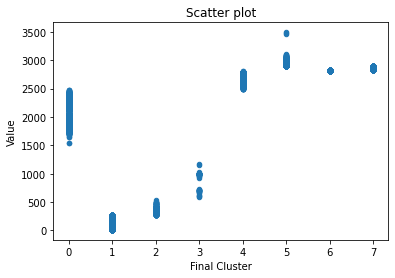

In [83]:
import matplotlib.pyplot as plot

df_finalized_cluster.plot.scatter(x="Final Cluster", y="Value", title= "Scatter plot");
plot.show(block=True);

In [ ]:
df_finalized_cluster.to_csv("df_finalized_cluster.csv")

In [84]:
df_finalized_cluster['Final Cluster'].unique()

array([0, 2, 3, 1, 4, 6, 5, 7])

In [85]:
print(df_finalized_cluster['Final Cluster'].value_counts())

2    14473
6     6264
7     4590
0     1892
5     1303
1      894
4      822
3       55
Name: Final Cluster, dtype: int64


In [81]:
# #copying each finalized cluster labeled values to a seperate df
# df_final_0= df_finalized_cluster[df_finalized_cluster['Final Cluster']==0].copy()
# df_final_1= df_finalized_cluster[df_finalized_cluster['Final Cluster']==1].copy()
# df_final_2= df_finalized_cluster[df_finalized_cluster['Final Cluster']==2].copy()
# df_final_3= df_finalized_cluster[df_finalized_cluster['Final Cluster']==3].copy()
# df_final_4= df_finalized_cluster[df_finalized_cluster['Final Cluster']==4].copy()
# df_final_5= df_finalized_cluster[df_finalized_cluster['Final Cluster']==5].copy()
# df_final_6= df_finalized_cluster[df_finalized_cluster['Final Cluster']==6].copy()
# df_final_7= df_finalized_cluster[df_finalized_cluster['Final Cluster']==7].copy()

In [86]:
# df_final_0.describe()

In [88]:
percent2 = 14473 / 30293 * 100
print(percent2)

47.77671409236458


In [91]:
percent6 = 6264 / 30293 * 100
print(percent6)

20.678044432707228


In [92]:
percent7 = 4590 / 30293 * 100
print(percent7)

15.15201531706995


In [93]:
df_label_2= df_finalized_cluster[df_finalized_cluster['Final Cluster']==2].copy()

In [100]:
df_label_2.describe()

,Value,labels,Second_labeling,Final Cluster
count,14473.000000,14473.0,14473.0,14473.0
mean,341.754177,1.0,1.0,2.0
std,17.234585,0.0,0.0,0.0
min,274.228455,1.0,1.0,2.0
25%,330.150330,1.0,1.0,2.0
50%,331.548340,1.0,1.0,2.0
75%,361.849365,1.0,1.0,2.0
max,534.020081,1.0,1.0,2.0


In [ ]:
# df_label_1_fil = df_label_1.iloc[:, [0]].values

In [ ]:
# import numpy as np
# import pandas as pd
# outliers=[]
# def detect_outlier(data_1):
    
#     threshold=1
#     mean_1 = np.mean(data_1)
#     std_1 =np.std(data_1)
    
    
#     for y in data_1:
#         z_score= (y - mean_1)//std_1 
#         if np.abs(z_score) > threshold:
#             outliers.append(y)
#     return outliers

In [ ]:
# outlier_datapoints = detect_outlier(df_label_1_fil)
# print(outlier_datapoints)

In [ ]:
# print('Identified z score outliers: %d' % len(outlier_datapoints))

In [96]:
df_label_6= df_finalized_cluster[df_finalized_cluster['Final Cluster']==6].copy()

In [101]:
df_label_6.describe()

,Value,labels,Second_labeling,Final Cluster
count,6264.000000,6264.0,6264.0,6264.0
mean,2812.794197,2.0,2.0,6.0
std,2.667251,0.0,0.0,0.0
min,2801.419922,2.0,2.0,6.0
25%,2811.449218,2.0,2.0,6.0
50%,2812.781616,2.0,2.0,6.0
75%,2814.078247,2.0,2.0,6.0
max,2826.934814,2.0,2.0,6.0


In [ ]:
# df_label_6_fil = df_label_6.iloc[:, [0]].values

In [ ]:
# outlier_datapoints = detect_outlier(df_label_6_fil)
# print(outlier_datapoints)

In [ ]:
# print('Identified z score outliers: %d' % len(outlier_datapoints))

In [98]:
df_label_7= df_finalized_cluster[df_finalized_cluster['Final Cluster']==7].copy()

In [102]:
df_label_7.describe()

,Value,labels,Second_labeling,Final Cluster
count,4590.000000,4590.0,4590.0,4590.0
mean,2868.645226,2.0,3.0,7.0
std,8.473422,0.0,0.0,0.0
min,2828.276123,2.0,3.0,7.0
25%,2865.027588,2.0,3.0,7.0
50%,2868.987427,2.0,3.0,7.0
75%,2873.079529,2.0,3.0,7.0
max,2890.234375,2.0,3.0,7.0


In [ ]:
# df_label_7_fil = df_label_7.iloc[:, [0]].values

In [ ]:
# outlier_datapoints = detect_outlier(df_label_7_fil)
# print(outlier_datapoints)

In [ ]:
# print('Identified z score outliers: %d' % len(outlier_datapoints))